<a href="https://colab.research.google.com/github/nikki14182/ClassifyingFlowerTypes/blob/main/social_buzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Content.csv to Content.csv
Saving Reactions.csv to Reactions.csv
Saving ReactionTypes.csv to ReactionTypes.csv


In [20]:
content_db = pd.read_csv("Content.csv")
content_db.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [21]:
reaction_db = pd.read_csv("Reactions.csv")
reaction_db.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [22]:
reaction_type_db = pd.read_csv("ReactionTypes.csv")
reaction_type_db.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


Content dataset

In [ ]:
# checking for null values in content dataset

content_db.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [16]:
# dropping 199 missing values from content dataset

content = content_db.dropna()

In [ ]:
# checking that all missing values were removed from dataset

content.isna().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Category      0
URL           0
dtype: int64

Removing duplicate values

In [32]:
for i in content['Category']:
  if "" in i:
      content['Category'].replace('""','')

content['Category']

0            Studying
1      healthy eating
2      healthy eating
3          technology
4                food
            ...      
994           science
996        technology
997          veganism
998           culture
999        technology
Name: Category, Length: 801, dtype: object

Removing unnecessary columns

In [33]:
# removing columns URL and User ID from dataset as they are not relevant to our analysis

content_df = content.drop(columns=['URL', 'User ID'])
content_df.head()

,Unnamed: 0,Content ID,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [34]:
# renaming type column in content dataset to give more context for the type of information that is being stored in type column

new_content_df = content_df.rename(columns= {'Type': 'Content Type'})
new_content_df

,Unnamed: 0,Content ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...,...
994,994,c54b49c4-b1f2-4641-8595-1cbd19937845,photo,science
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


Reaction dataset

In [23]:
reaction_db.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [24]:
# checking for null values in reaction dataset

reaction_db.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [25]:
# removing 3,999 missing values in reaction dataset

reaction = reaction_db.dropna()

In [27]:
# checking that all missing values were removed from dataset

reaction.isna().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64

In [28]:
# removing User ID column as it is not need for our analysis

reaction_df = reaction.drop(columns= ['User ID'])
reaction_df

,Unnamed: 0,Content ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...,...
25547,25547,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [29]:
# renaming type column to provide more context

new_reaction_df = reaction_df.rename(columns= {'Type': 'Reaction Type'})
new_reaction_df

,Unnamed: 0,Content ID,Reaction Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...,...
25547,25547,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


Reaction type dataset

In [35]:
reaction_type_db.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [36]:
# renaming type column to provide more context

new_reaction_type_df = reaction_type_db.rename(columns= {'Type': 'Reaction Type'})
new_reaction_type_df

,Unnamed: 0,Reaction Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


## Data Modeling

In [38]:
# merging all three datasets into one dataset 

df = new_reaction_df.merge(new_content_df, on='Content ID', how='left').merge(new_reaction_type_df, on='Reaction Type', how='left')


df

,Unnamed: 0_x,Content ID,Reaction Type,Datetime,Unnamed: 0_y,Content Type,Category,Unnamed: 0,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,0.0,photo,Studying,2,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,0.0,photo,Studying,11,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,0.0,photo,Studying,14,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,0.0,photo,Studying,2,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,0.0,photo,Studying,4,positive,30
...,...,...,...,...,...,...,...,...,...,...
22529,25547,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,999.0,audio,technology,15,negative,12
22530,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,999.0,audio,technology,11,negative,10
22531,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,999.0,audio,technology,12,positive,45
22532,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,999.0,audio,technology,15,negative,12


In [39]:
# removing unnecessary columns created when datasets were merged together

merged_df = df.drop(columns= ['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'])

merged_df

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30
...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,audio,technology,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology,negative,12


Top 5 Performing Categories

In [40]:
# calculating sum of top 5 performing categories on Social Buzz based on score

top_categories = merged_df.groupby('Category')['Score'].sum().nlargest(5)
top_categories

Category
travel            53935
science           53657
healthy eating    52745
animals           52443
cooking           49681
Name: Score, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

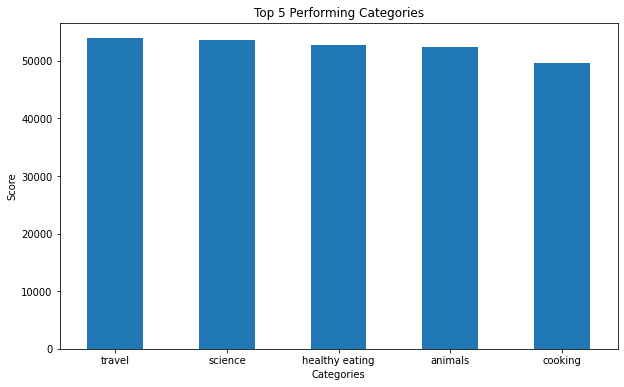

In [44]:
# creating bar plot for top 5 performing categories on Social Buzz

top_categories.plot(kind='bar', title='Top 5 Performing Categories', xlabel='Categories', ylabel='Score', figsize=(10, 6))

plt.xticks(rotation=0)